In [1]:
%matplotlib inline

from __future__ import division
import sys
sys.path.insert(0, "~/.local/lib/python3.6/site-packages")

from pylab import np, plt
import scipy.constants as const

import sympy
from sympy import *
from sympy.physics.quantum import *

def express(a, b, name):
    sym = symbols(name)
    sol = solve(a-sym, b)
    assert len(sol) == 1
    return (sym, sol[0])


def frange(x, y, jump):
    i = 0
    curr = x + i*jump
    
    while curr < y:
        yield curr
        i += 1
        curr = x + i*jump
    

import gmpy2
import mpmath
gmpy2.get_context().precision = 10
mpmath.mp.dps = 10

In [2]:
a = 1

def F(t,K):
    return np.cos(2*np.pi*t) + (a*K/(4*np.pi*t)) * np.sin(2*np.pi*t)

def q(t,K):
    n = np.round(t)
    s = np.where( np.equal(n, np.floor(t)), 1, -1 )
    return ( 2*np.pi*n + s*np.arccos(F(t,K)) )/a

def E(t):
    return t**2 / (2 * a**2)

In [3]:
def plot_disperzni(K):
    t = np.arange(-2.0, 2.0, 0.001)
    q_ = q(t,K)
    E_ = E(t)

    plt.rcParams.update({
        'axes.labelsize' : 20,
        'font.family' : 'serif'
    })
    plt.figure(figsize=[10, 6])
    plt.plot(q_, E_)

    plt.xlabel('$q$')
    plt.ylabel('$\\frac{E}{\mathrm{h}^2 M^{-1}}$')
    plt.title('Disperzní relace, K='+str(K)+', a=1')
    plt.grid(True)
    plt.savefig('disperzni'+str(K)+'.pdf')
    plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


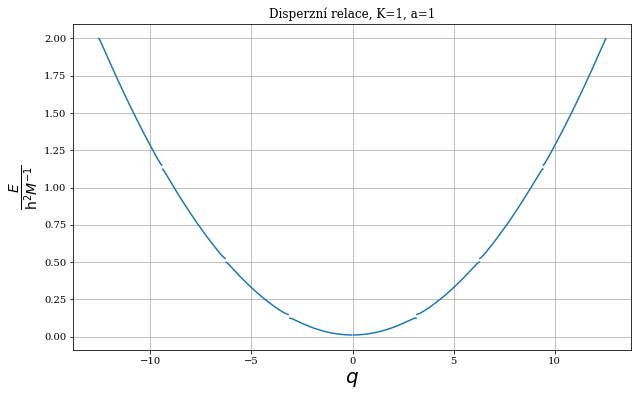

In [4]:
plot_disperzni(1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


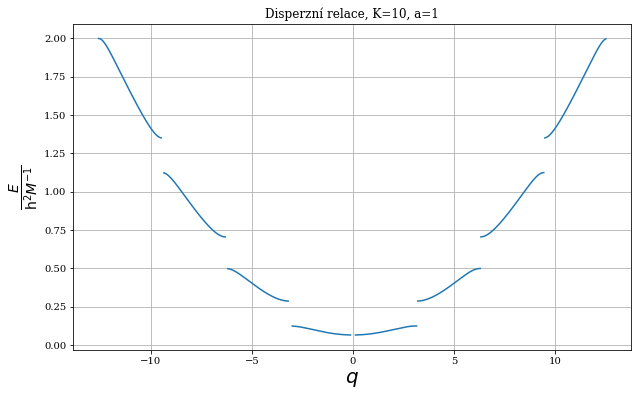

In [5]:
plot_disperzni(10)

In [6]:
E_, q_, a_, K_, t_ = symbols('E q a K t')
t__ = a_ * sqrt(2*E_)
E__ = t_**2 / (2*a**2)
theta_ = cos(2*pi*t_) + (a*K_/(4*pi*t_))*sin(2*pi*t_)
theta_.diff(t_)

K*cos(2*pi*t)/(2*t) - K*sin(2*pi*t)/(4*pi*t**2) - 2*pi*sin(2*pi*t)

In [7]:
t__.diff(E_)

sqrt(2)*a/(2*sqrt(E))

In [8]:
Implicit_E = cos(q_*a_) - theta_.subs(t_,t__)
Implicit_E

cos(a*q) - cos(2*sqrt(2)*pi*sqrt(E)*a) - sqrt(2)*K*sin(2*sqrt(2)*pi*sqrt(E)*a)/(8*pi*sqrt(E)*a)

In [9]:
Implicit_dE = - Implicit_E.diff(q_) / Implicit_E.diff(E_)
Implicit_dE = Implicit_dE.subs(E_, E__)
Implicit_dE = Implicit_dE.subs(sqrt(t_**2), t_)
Implicit_dE = simplify(Implicit_dE)
Implicit_dE

4*pi*a**2*t**3*sin(a*q)/(-2*pi*K*a*t*cos(2*pi*a*t) + K*sin(2*pi*a*t) + 8*pi**2*a**2*t**2*sin(2*pi*a*t))

In [10]:
dE_λ = lambda t,K,q: (4*np.pi*a**2*t**3*np.sin(a*q)/(-2*np.pi*K*a*t*np.cos(2*np.pi*a*t) + K*np.sin(2*np.pi*a*t) + 8*np.pi**2*a**2*t**2*np.sin(2*np.pi*a*t)))
def dE(t,K):
    return dE_λ(t,K,q(t,K))

In [11]:
def plot_grupova_q(K):
    t = np.arange(-2.0, 2.0, 0.00001)
    q_ = q(t,K)
    v_ = 2*np.pi*dE(t,K)

    plt.rcParams.update({
        'axes.labelsize' : 20,
        'font.family' : 'serif'
    })
    plt.figure(figsize=[10, 5])
    plt.plot(q_, v_)

    plt.xlabel('$q$')
    plt.ylabel('$\\frac{v_\mathrm{g}}{\mathrm{h} M^{-1}}$')
    plt.title('Grupová rychlost, K='+str(K)+', a=1')
    plt.grid(True)
    plt.savefig('grupova'+str(K)+'_q.pdf')
    plt.show()
    
def plot_grupova_E(K):
    t = np.arange(-2.0, 2.0, 0.00001)
    E_ = E(t)
    v_ = 2*np.pi*dE(t,K)

    plt.rcParams.update({
        'axes.labelsize' : 20,
        'font.family' : 'serif'
    })
    plt.figure(figsize=[10, 5])
    plt.plot(E_, v_)
    
    plt.ylim(0, 2)
    plt.xlabel('$E/\mathrm{h}^2 M^{-1}$')
    plt.ylabel('$\\frac{v_\mathrm{g}}{\mathrm{h} M^{-1}}$')
    plt.title('Grupová rychlost, K='+str(K)+', a=1')
    plt.grid(True)
    plt.savefig('grupova'+str(K)+'_E.pdf')
    plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


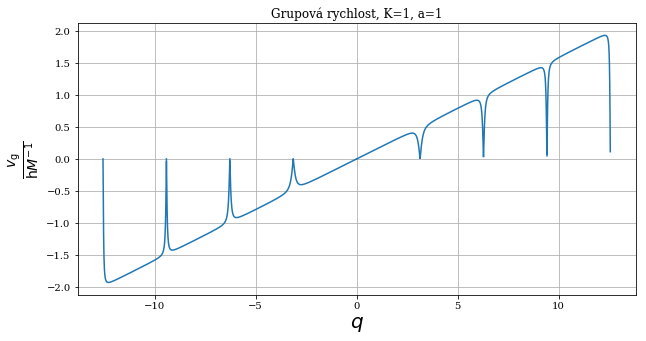

In [12]:
plot_grupova_q(1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


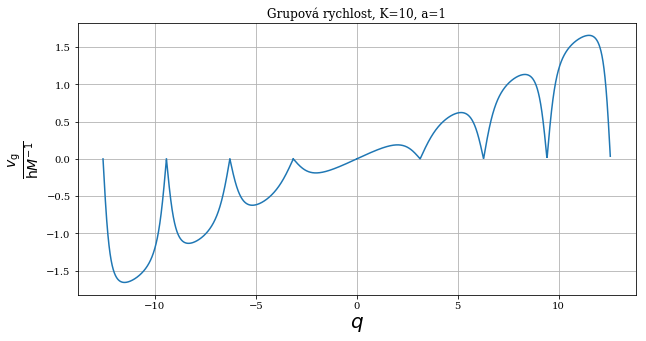

In [13]:
plot_grupova_q(10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


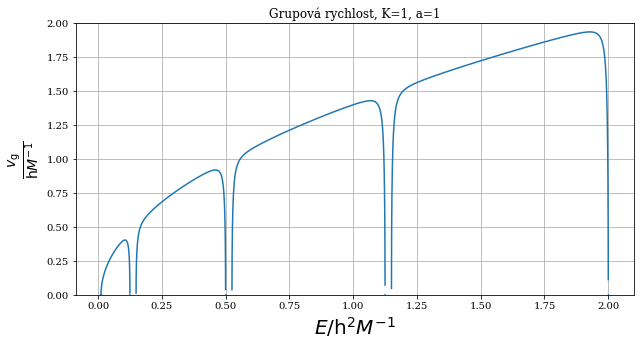

In [14]:
plot_grupova_E(1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


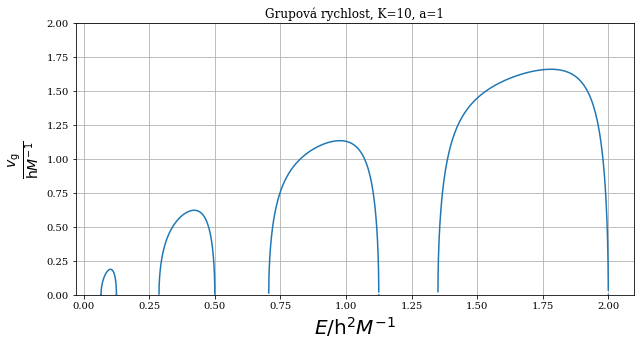

In [15]:
plot_grupova_E(10)

In [16]:
a = 1

def Fn(t,K):
    return np.cosh(2*np.pi*t) + (a*K/(4*np.pi*t)) * np.sinh(2*np.pi*t)

def qn(t,K):
    n = np.round(t)
    s = np.where( np.equal(n, np.floor(t)), 1, -1 )
    return ( 2*np.pi*n + s*np.arccos(Fn(t,K)) )/a

def En(t):
    return t**2 / (2 * a**2)


In [20]:
def plot_disperzni_neg(K):
    t = np.arange(-1.0, 1.0, 0.0001)
    q_ = qn(t,K)
    E_ = En(t)
    
    E_ = np.where( E_ > 1e-10, E_, np.nan )
    
    q_ = np.concatenate(tuple(q_ + 2*n*np.pi for n in range(-2, 3)))
    E_ = np.concatenate(tuple(E_ for n in range(-2, 3)))

    plt.rcParams.update({
        'axes.labelsize' : 20,
        'font.family' : 'serif'
    })
    plt.figure(figsize=[10, 5])
    plt.plot(q_, E_)

    plt.xlim(-10,10)
    plt.xlabel('$q$')
    plt.ylabel('$\\frac{E}{\mathrm{h}^2 M^{-1}}$')
    plt.title('Disperzní relace, K=$'+str(K)+'$, a=$1$')
    plt.grid(True)
    plt.savefig('disperzni'+str(K)+'_neg.pdf')
    plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


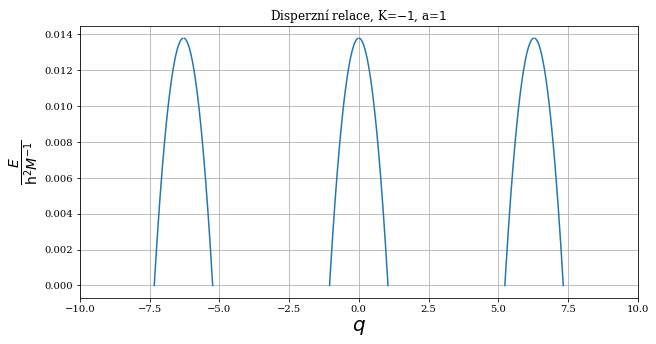

In [21]:
plot_disperzni_neg(-1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


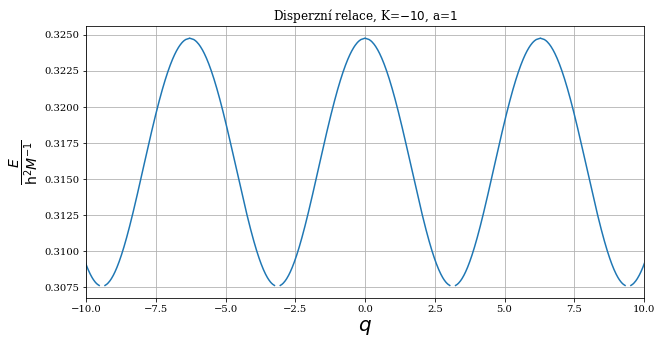

In [22]:
plot_disperzni_neg(-10)